In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier CSV.
df_btc = pd.read_csv('../CSV/BTC.csv', parse_dates=['Date'])
df_sp500 = pd.read_csv('../CSV/S&P500.csv', parse_dates=['Date'])
df_gold = pd.read_csv('../CSV/XAU(GOLD).csv', parse_dates=['Date'])

# Facultatif : mettre la date en index
df_btc.set_index('Date', inplace=True)
df_sp500.set_index('Date', inplace=True)
df_gold.set_index('Date', inplace=True)


In [17]:
print("Statistiques descriptives pour BTC :")
print(df_btc.describe())

print("\nStatistiques descriptives pour S&P500 :")
print(df_sp500.describe())

print("\nStatistiques descriptives pour GOLD :")
print(df_gold.describe())


Statistiques descriptives pour BTC :
          Close/Last  Volume           Open          High            Low
count    1883.000000     0.0    1883.000000    1883.00000    1883.000000
mean    34040.240998     NaN   34020.393840   34367.86240   33718.551832
std     24396.582505     NaN   24382.936974   24605.04472   24179.405908
min      3864.900000     NaN    3864.600000    3894.70000    3810.700000
25%     11361.600000     NaN   11368.050000   11408.80000   11229.700000
50%     28285.600000     NaN   28203.900000   28460.30000   28109.200000
75%     50395.100000     NaN   50709.850000   51436.25000   49898.250000
max    106484.000000     NaN  106504.000000  106961.00000  105686.000000

Statistiques descriptives pour S&P500 :
        Close/Last         Open         High          Low
count  2522.000000  2522.000000  2522.000000  2522.000000
mean   3392.310508  3386.074453  3403.992284  3366.780682
std    1107.371794  1119.270700  1124.861992  1113.499700
min    1829.080000     0.000000  

In [18]:
df_btc.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-02-09,96852.7,NaN,96218.7,97297.8,96369.0
2025-02-08,96623.3,NaN,95981.2,96862.8,95716.1
2025-02-07,96402.1,NaN,97460.6,96862.8,96237.1
2025-02-06,97467.5,NaN,97623.4,97872.2,96424.2
2025-02-05,97631.2,NaN,98042.5,97824.0,96510.6


In [19]:
df_btc=df_btc.drop(columns=["Volume"],axis=1)

<Axes: ylabel='Date'>

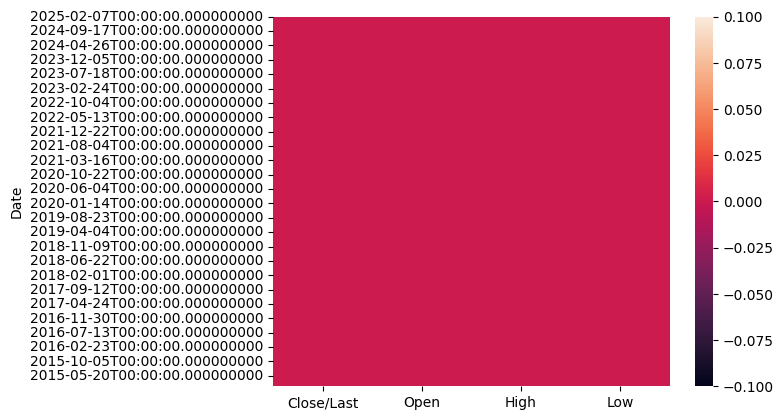

In [20]:
sns.heatmap(df_sp500.isnull())


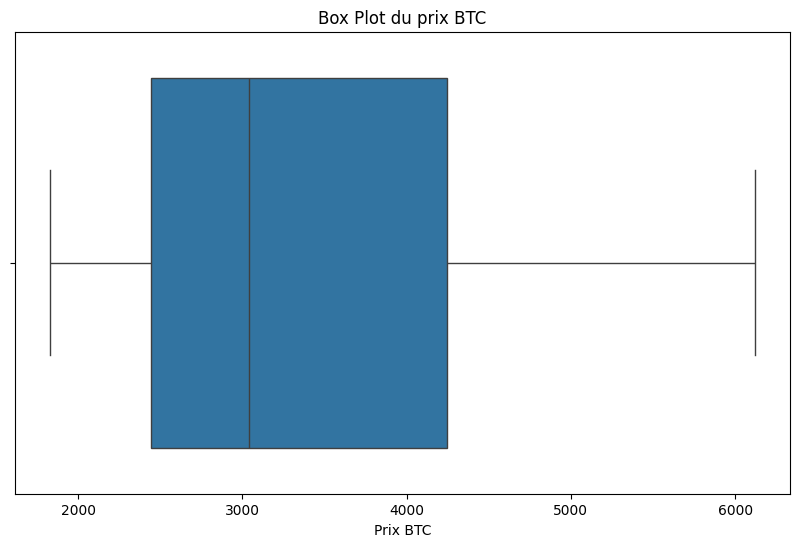

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sp500['Close/Last'])
plt.title("Box Plot du prix BTC")
plt.xlabel("Prix BTC")
plt.show()


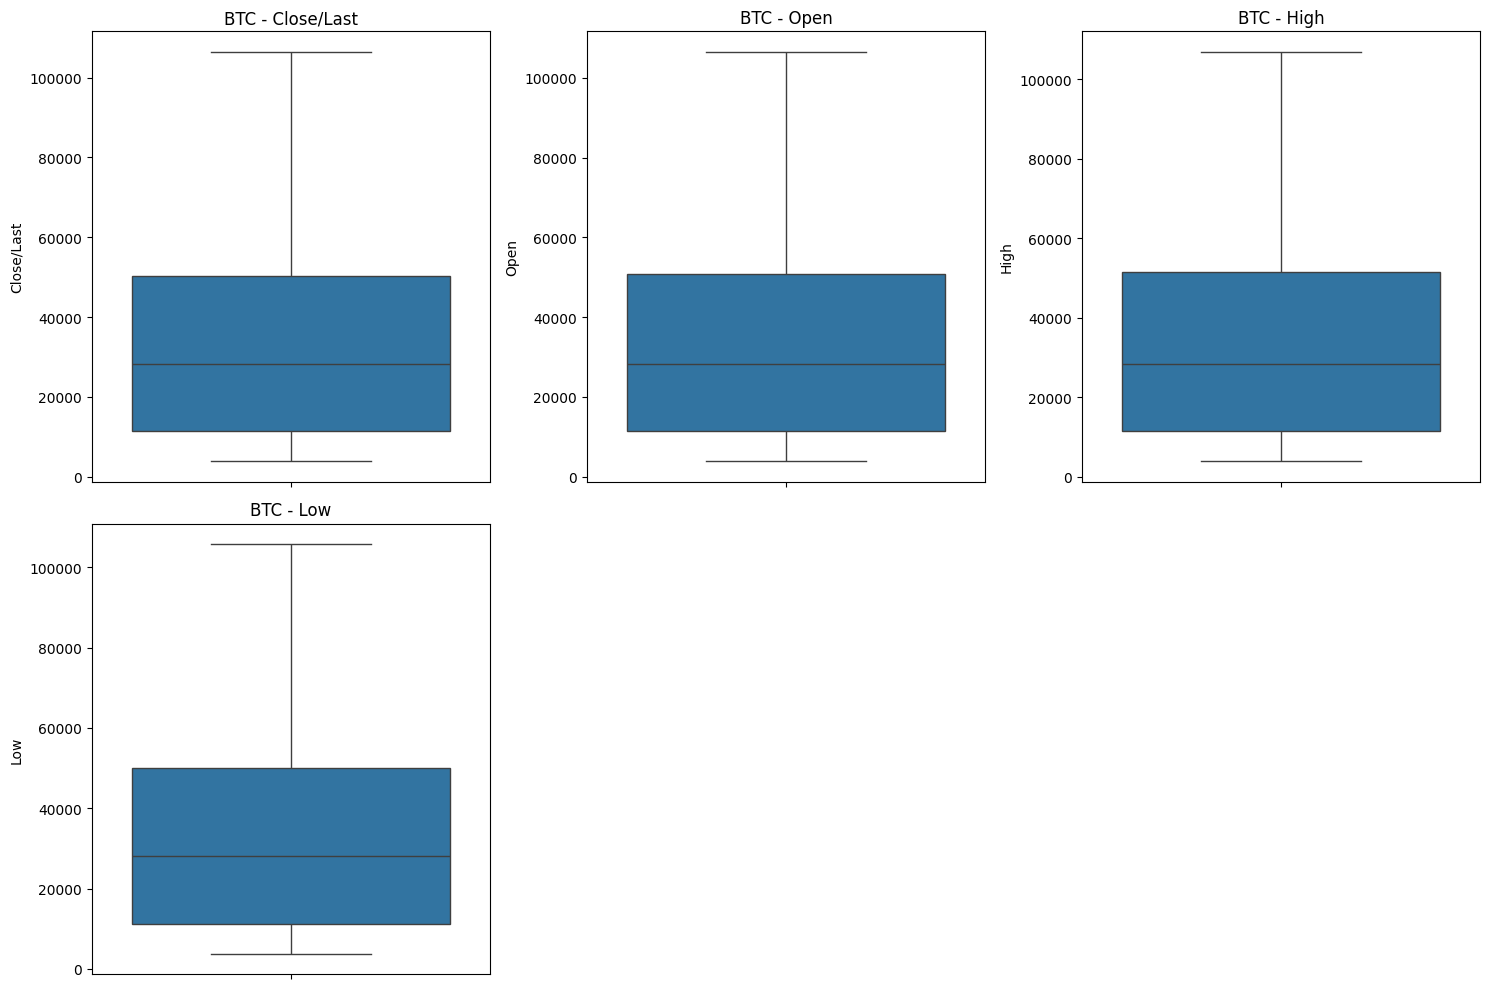

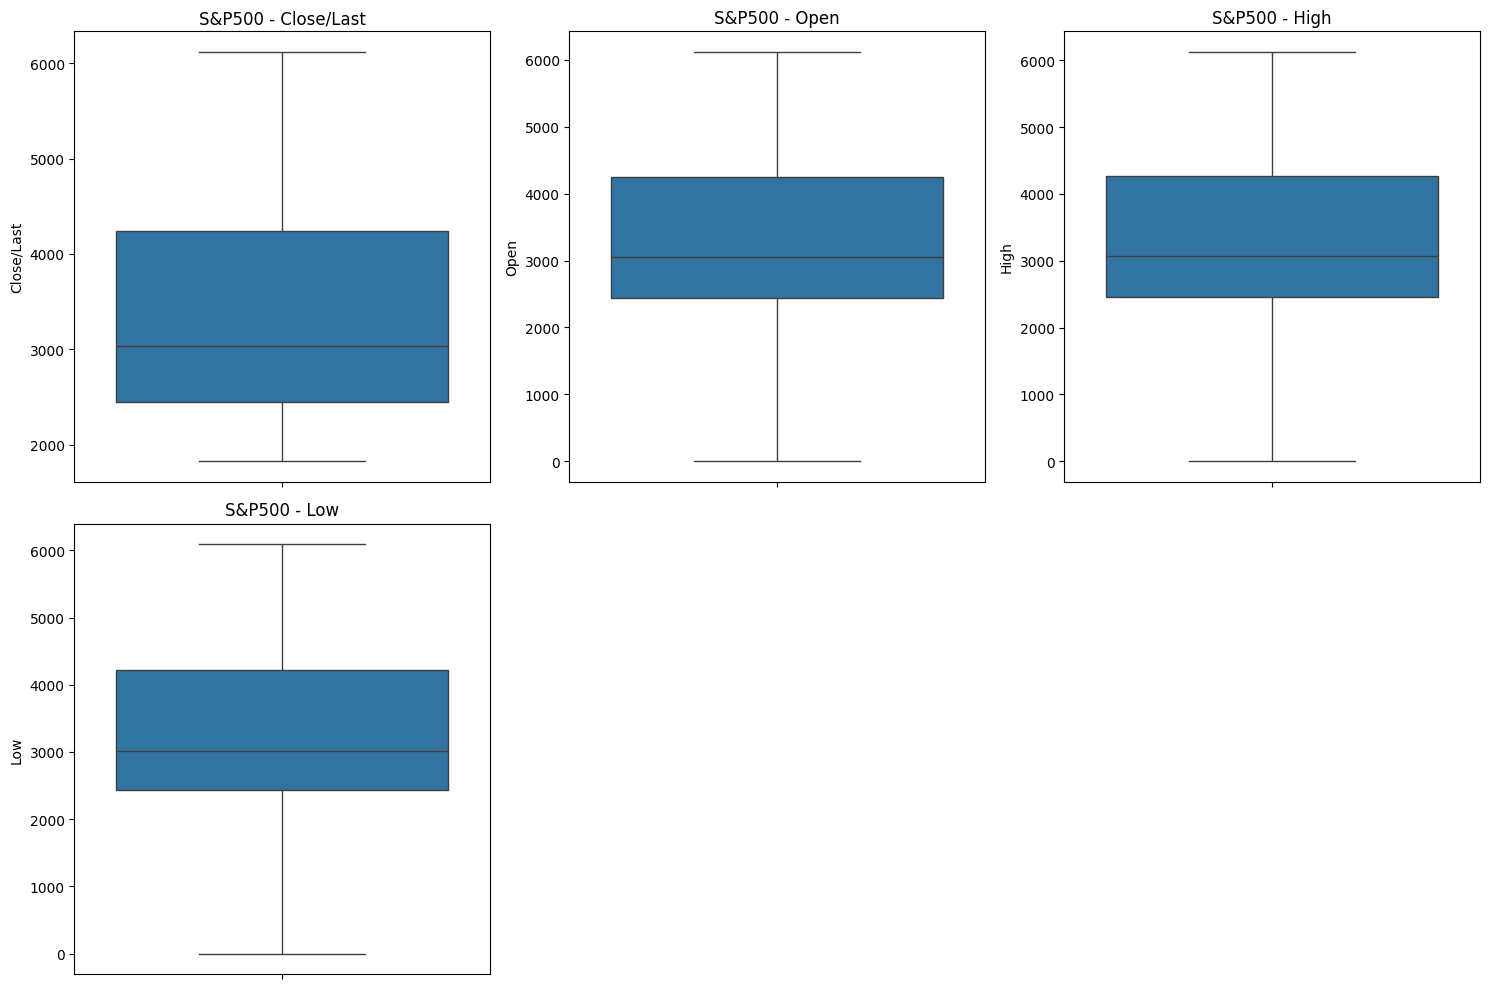

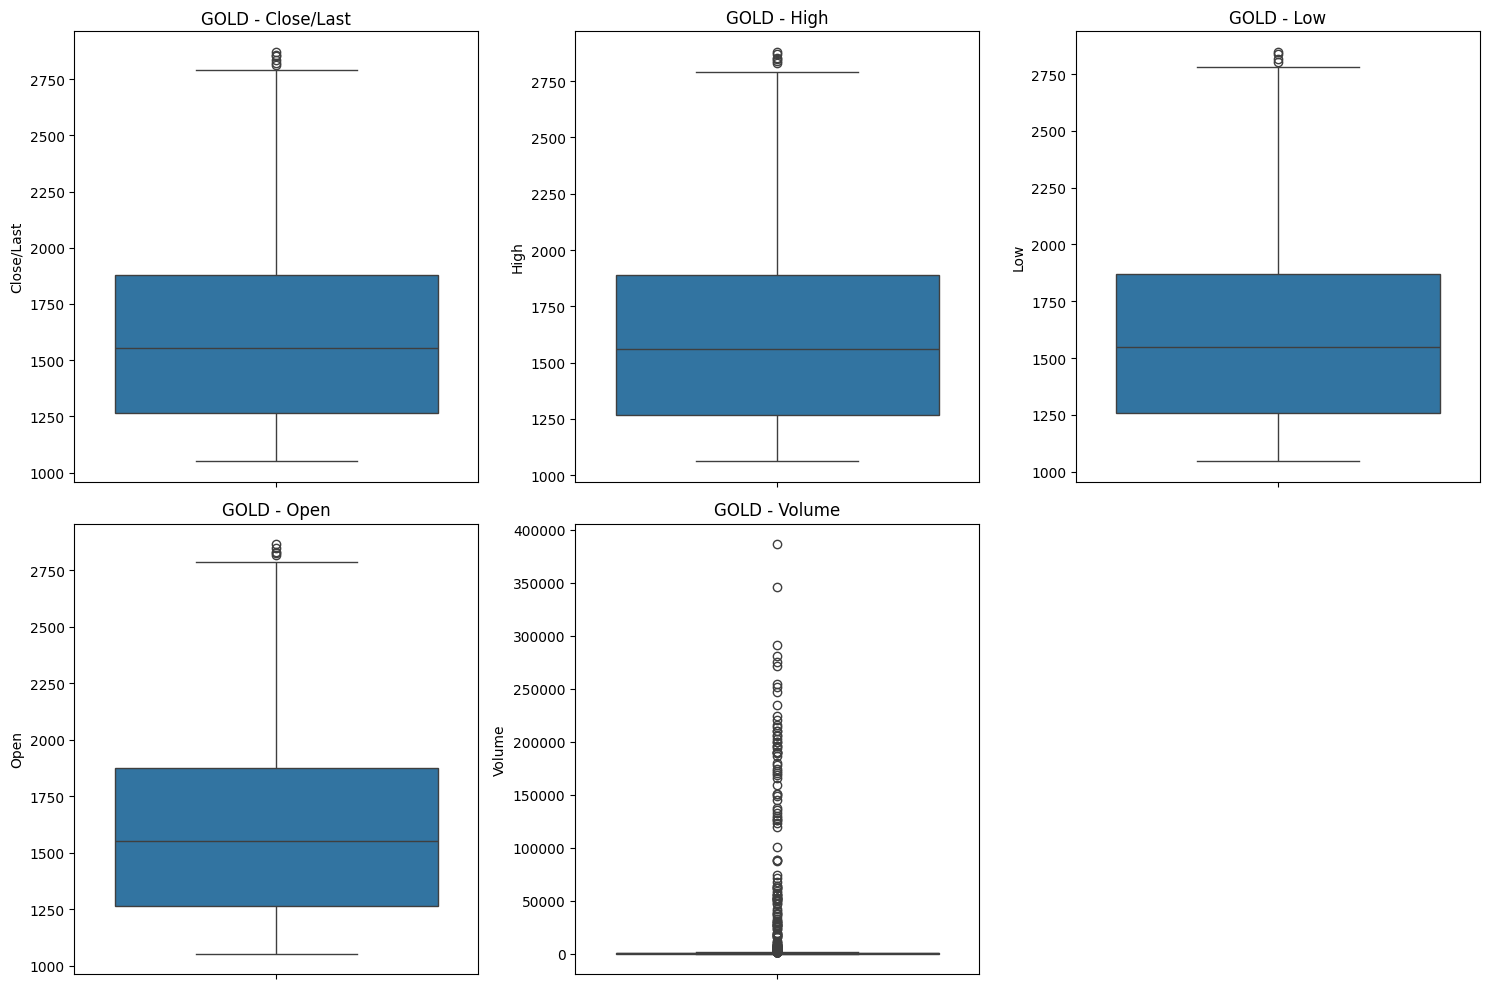

In [22]:
def plot_boxplots(df, asset_name):
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Définir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'itération
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour éviter les erreurs
        data = df[col].dropna()
        # Vérifier que la série n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide après suppression des NaN. Box plot ignoré.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut être peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer à la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilisés, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames déjà chargés et indexés sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [23]:
#Fonction pour calculer les rendements
def compute_returns(df, asset_name):
    df["Date"] = pd.to_datetime(df["Date"])  # Convertir la colonne Date en format datetime
    df = df.sort_values("Date")  # Trier les données par date
    df = df.set_index("Date")  # Définir la colonne Date comme index

    # Vérifier si la colonne de prix existe (remplace "Close/Last" par le vrai nom si différent)
    price_col = "Close/Last"  
    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Voici les colonnes disponibles :", df.columns)
        return df  # Retourne le DataFrame sans calculer les rendements

    # Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # Affichage des rendements moyens
    print(f"\n📊 Rendements moyens pour {asset_name}:")
    print(f"✅ Quotidien: {df['Daily Return'].mean():.4%}")
    print(f"✅ Mensuel: {df['Monthly Return'].mean():.4%}")
    print(f"✅ Annuel: {df['Annual Return'].mean():.4%}")

    return df


In [26]:
# Charger les fichiers avec les bons chemins
#btc_df = pd.read_csv("../CSV/BTC.csv")
#sp500_df = pd.read_csv(sp500_df = pd.read_csv(r"/Users/martinvalentine/Desktop/EPITECH/piscine 1 spe data/Groupe1_DataBI_Ftech/Groupe1_DataBI_Ftech/CSV/S&P500.csv")
#gold_df = pd.read_csv("../CSV/XAU(GOLD).csv")

# Appliquer la fonction à chaque actif
df_btc = compute_returns(df_btc, "Bitcoin (BTC)")
#sp500_df = compute_returns(sp500_df, "S&P 500")
df_gold = compute_returns(df_gold, "Gold (XAU)")

KeyError: 'Date'